In [1]:
import pandas as pd
import numpy as np
import tensorflow 
import pandas_datareader as web
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




c:\Users\PC\anaconda3\envs\virenv1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=web.DataReader('AAPL', data_source='yahoo',start='2012-01-03',end='2019-12-17')


In [3]:
data=df['Open']
cdf=data.values
eig=math.ceil(len(cdf)*0.8)
cdf=cdf.reshape(-1,1)


In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
cdf=scaler.fit_transform(cdf)
train_data=cdf[0:eig,:]

In [5]:
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
x_train, y_train=np.array(x_train), np.array(y_train)    

In [6]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [7]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))


In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(x_train,y_train , batch_size=1, epochs=1)

1543/1543 [==============================] - 66s 38ms/step - loss: 6.4878e-04


In [10]:
test_data=cdf[eig-60:,:]
x_test=[]
y_test=cdf[eig:,:]
for i in range (60 ,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [11]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test=np.array(y_test)

In [12]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
y_test=scaler.inverse_transform(y_test)

In [13]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.0104591941833496

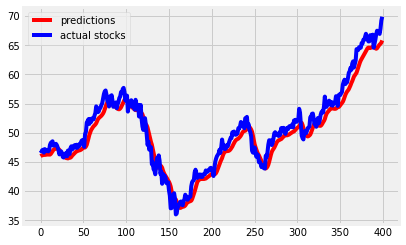

In [14]:
plt.plot(predictions,color='red',label='predictions')
plt.plot(y_test,color='blue',label='actual stocks')
plt.legend()